In [1]:
import sys
import IPython
import sklearn
import sklearn.preprocessing
import librosa
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import torch
import torchaudio
import torchaudio.transforms
import numpy as np

In [99]:
IPython.display.Audio("./data/wakeword_55.wav")

In [101]:
IPython.display.Audio("./data/background_10.wav")

In [2]:
def create_mel_spectrogram(file_name):
        audio_sample, sample_rate = librosa.load(file_name, sr=None)
        mfcc = librosa.feature.melspectrogram(y=audio_sample, sr=sample_rate)
        mfcc = librosa.power_to_db(mfcc, ref=np.max)
        librosa.display.specshow(mfcc)

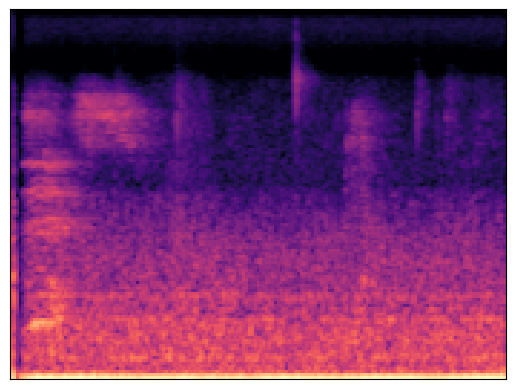

In [3]:
create_mel_spectrogram("./data/background_199.wav")

In [20]:
print(mfcc.shape)

(128, 173)


In [21]:
audio_sample, sample_rate = librosa.load("./data/background_199.wav", sr=None)
print(len(audio_sample))

88200


In [37]:
def trim_beginning(file_name):
        '''
        Data exploration reveals that the word "go"
        is audible in a large portion of the positive samples.
        This is understandable, as "go" was the word that prompted
        a person to say the wake word when collecting data
        We will trim the first 200 ms of th audio file.
        '''
        audio_sample, sample_rate = librosa.load(file_name, sr=None)

        #each element in audio_sample rpresents 1/44100 of a second
        #therefore we will remove the first 2205 elements (300 ms)
        #ms*frerquency/1000
        trimmed_audio = audio_sample[13230:]
        return trimmed_audio, sample_rate

In [84]:
audio_sample,fs = trim_beginning("./data/wakeword_80.wav")
print(len(audio_sample))
write("test.wav", fs, audio_sample)
IPython.display.Audio("test.wav")



74970


In [96]:
audio_signal_new = librosa.effects.pitch_shift(y=audio_sample, sr=44100, n_steps=2) #-3 max #5
print(len(audio_sample))
write("test.wav", fs, audio_signal_new)
IPython.display.Audio("test.wav")

74970


In [56]:
create_mel_spectrogram('test.wav')

(128, 147)


/Users/stephone_christian/Desktop/wakeword/source/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/stephone_christian/Desktop/wakeword/source/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


array([[-1.3089434e+00, -3.9667588e-01, -7.4682069e-01, ...,
         4.4272327e+00,  3.2551033e+00, -7.0129502e-01],
       [ 1.7230525e+00,  1.9100007e+00, -4.8456892e-01, ...,
         4.5928354e+00,  2.4583070e+00, -1.7665794e-01],
       [ 5.3461227e+00,  6.3426852e-01,  4.9020043e-01, ...,
         1.5504740e+00,  2.1449144e+00,  1.1678152e+00],
       ...,
       [ 3.0790963e-07,  7.4248156e-08, -2.6899065e-09, ...,
        -2.6899065e-09, -2.3523703e-09,  4.8512705e-09],
       [ 2.9009217e-07,  7.0001498e-08, -2.5326286e-09, ...,
        -2.5326286e-09, -2.2264457e-09,  4.2986503e-09],
       [ 2.8065401e-07,  6.7749909e-08, -2.4493043e-09, ...,
        -2.4493043e-09, -2.1597522e-09,  4.0063006e-09]], dtype=float32)

In [68]:
mel = create_mel_spectrogram("test.wav")
signal, _ = librosa.load("test.wav", sr=None)

signal = torch.from_numpy(signal).reshape(1, -1)
print('signal_shape', signal.shape)

spec = torchaudio.transforms.Spectrogram(n_fft=2048, hop_length=512, win_length=2048)
mel_pt = spec(signal)

print(mel_pt.shape)
print(mel.shape)

(128, 147)
signal_shape torch.Size([1, 74970])
torch.Size([1, 1025, 147])
(128, 147)


/Users/stephone_christian/Desktop/wakeword/source/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/stephone_christian/Desktop/wakeword/source/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [81]:
def time_mask(mel):
        mel_pt = torch.from_numpy(mel).reshape(1, mel.shape[0], mel.shape[1])
        print(mel_pt.shape)
        time_mask_ = torchaudio.transforms.TimeMasking(time_mask_param=20)
        masked_signal = time_mask_(mel_pt)
        masked_signal = masked_signal.squeeze().numpy()
        print(masked_signal.shape)
        assert masked_signal.shape == mel.shape
        return masked_signal

In [82]:
new_mel = time_mask(mel)

torch.Size([1, 128, 147])
(128, 147)


In [ ]:
time_mask = torchaudio.transforms.TimeMasking(time_mask_param=20)
masked_signal = time_mask(mel)
assert masked_signal.shape == mel.shape
return masked_signal